In [ ]:
# Problem Set 3

In [3]:
# Importss
! python -m pip install lightkurve --upgrade

  Using cached lightkurve-2.4.1-py3-none-any.whl (265 kB)
  Using cached uncertainties-3.1.7-py2.py3-none-any.whl (98 kB)
  Using cached memoization-0.4.0.tar.gz (41 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached oktopus-0.1.2.tar.gz (10 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached astroquery-0.4.6-py3-none-any.whl (4.5 MB)
  Using cached fbpca-1.0.tar.gz (11 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
  Using cached pyvo-1.4.2-py3-none-any.whl (888 kB)
  Using cached autograd-1.6.2-py3-none-any.whl (49 kB)
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11373 sha256=ee22a2d4161322806004a672046519af3863f3a7846a3fc06e1e266db5a38726
  Stored in directory: c:\users\julia\appdata\local\pip\cache\wheels\f5

In [3]:
# Imports 
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
import math
lcs = lk.search_lightcurve("Kepler-7b", mission="Kepler", cadence="short").download_all()
time = lcs[0].time.value # get the time of each observation
flux = np.array(lcs[0].flux.value.data) # get the flux
flux_err = np.array(lcs[0].flux_err.value.data) # get the error in the flux

In [51]:
lcs = lk.search_lightcurve("Kepler-7b", mission="Kepler", cadence="short").download_all()

# Directly access the time attribute without converting it to numpy array
time_attr = lcs[0].time

# Print the format and unit
print("Time format:", time_attr.format)
print("Time unit:", time_attr.unit)

# Then if needed, you can convert to numpy array
time = time_attr.value



Time format: bkjd


AttributeError: 'Time' object has no attribute 'unit'

In [7]:
# Checking length of array
print(len(time))
print(len(flux))
print(len(flux_err))


43097
43097
43097


In [8]:
# Checking to see that values seem right
print(time[:10])
print(flux[:10])
print(flux_err[:10])


[260.21486737 260.21554845 260.21622962 260.2169107  260.21759177
 260.21827275 260.21895393 260.219635   260.22031608 260.22099725]
[       nan 106615.76  106603.38  106582.23  106545.555 106666.62
 106665.22  106607.21  106536.27  106570.01 ]
[      nan 51.50673  51.49249  51.479904 51.4641   51.474815 51.513138
 51.4481   51.427048 51.430946]


In [13]:
# Cleaning NaN values
mask = np.isnan(flux)
flux[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), flux[~mask])

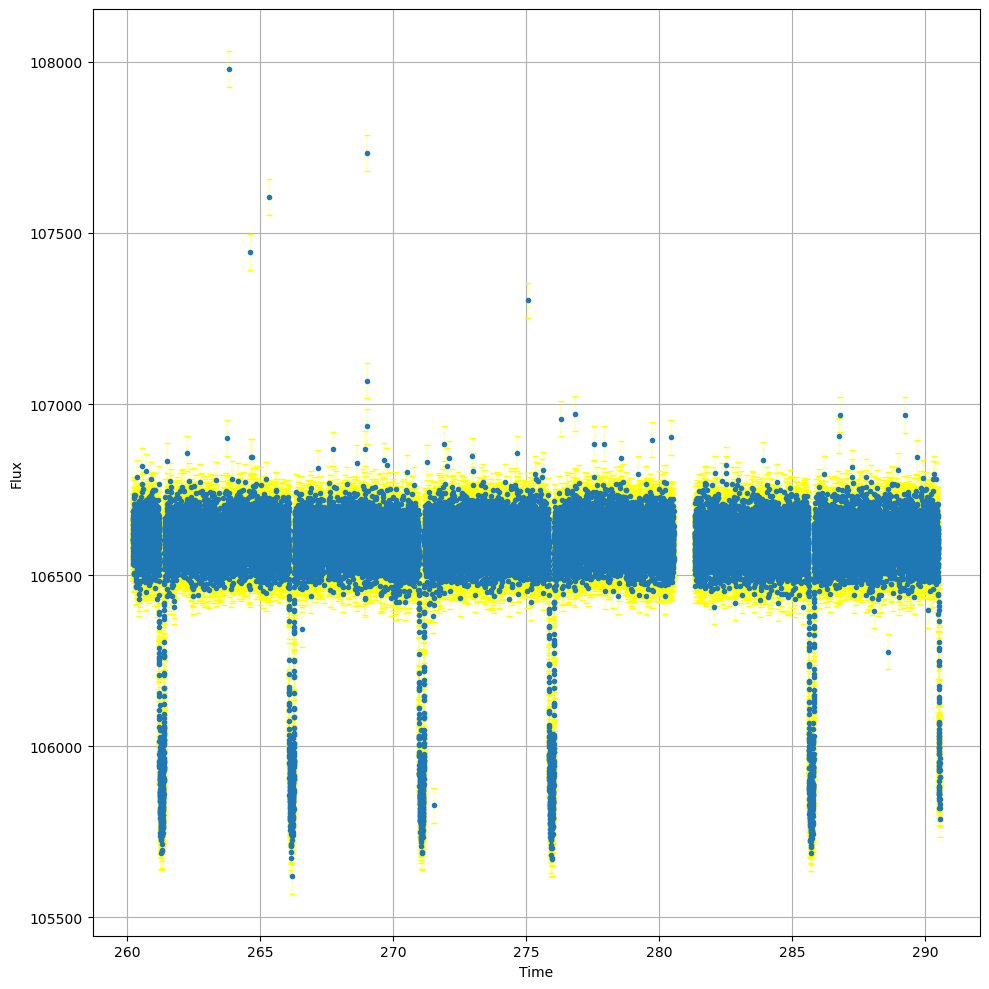

In [29]:
plt.figure(figsize=(10,10))
plt.errorbar(time, flux, yerr=flux_err, fmt= '.', elinewidth=0.3, ecolor='yellow', capsize=2)
plt.xlabel('Time')
plt.ylabel('Flux')
plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
# Problem 2
# The above shows an eclipse between t=280, and t=283. I am extracting these values using a mask.
mask = (time>=280) & (time<=282)
eclipse_time = time[mask]
eclipse_flux = flux[mask]
eclipse_flux_err = flux_err[mask]

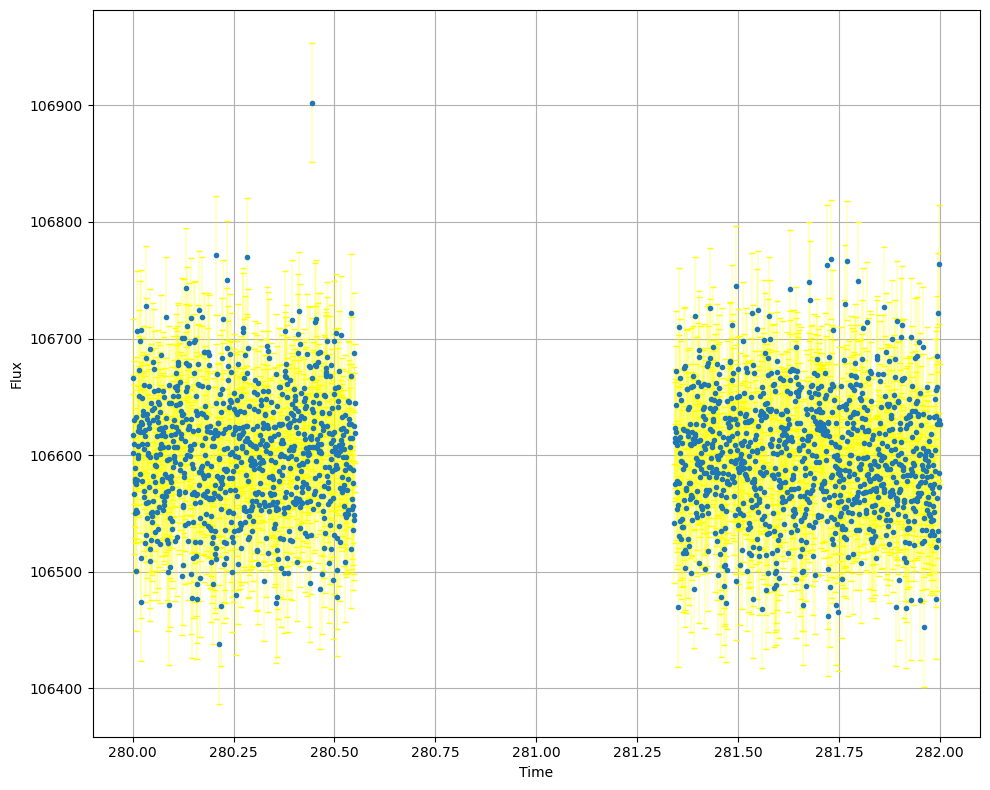

In [34]:
plt.figure(figsize=(10,8))
plt.errorbar(eclipse_time, eclipse_flux, yerr=eclipse_flux_err, fmt= '.', elinewidth=0.3, ecolor='yellow', capsize=2)
plt.xlabel('Time')
plt.ylabel('Flux')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Converting t to z 
z(t) = (t-t0)/tau

In [6]:
#Corrected flux code:
def lambda_function(p, z):
    if 1 + p < z:
        return 0
    elif abs(1 - p) < z <= 1 + p:
        k1 = math.acos((1 - p**2 + z**2) / (2*z))
        k0 = math.acos((p**2 + z**2 - 1) / (2*p*z))
        x = ((4*z**2 - (1 + z**2 - p**2)**2))**0.5
        return (1/np.pi) * (p**2 * k0 + k1 - 0.5 * x)
    elif z <= 1 - p:
        return p**2
    elif z <= p - 1:
        return 1
    else:
        return 0

def F(p, z):
    return 1 - lambda_function(p, abs(z))



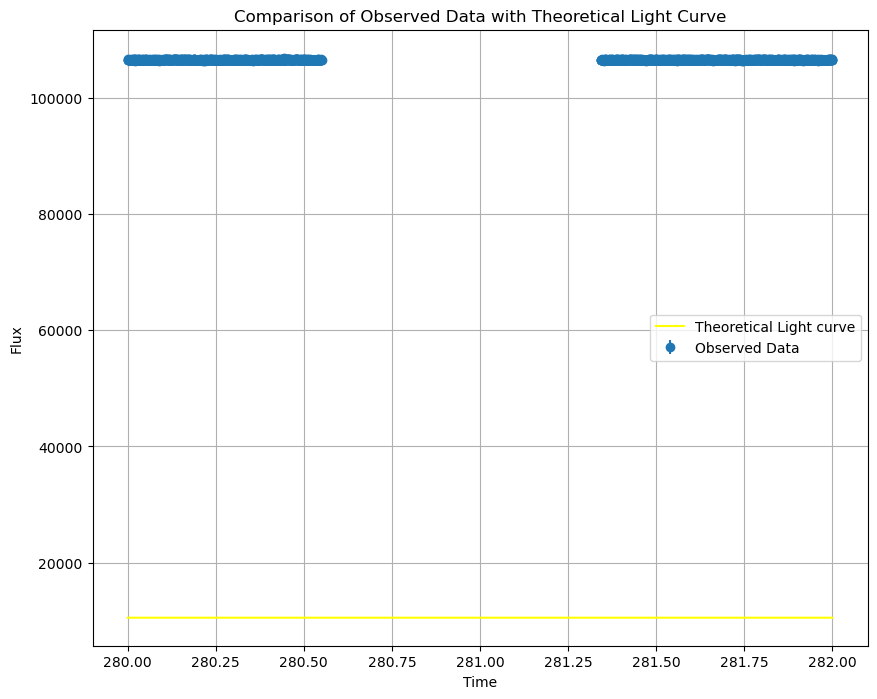

In [7]:
p = 0.1
# t0 is the time of maximal eclipse which is extimated at the midpoint
t0 = 281 
# tau is the duration of the eclipse which is about 2 days
tau = 2
z_eclipse = (eclipse_time-t0)/tau
unobscured_flux = 10600
F_theoretical = [unobscured_flux*F(p, z) for z in z_eclipse]
plt.figure(figsize=(10, 8))
plt.errorbar(eclipse_time, eclipse_flux, yerr=flux_err[mask], label='Observed Data', fmt='o')
plt.plot(eclipse_time, F_theoretical, label='Theoretical Light curve', color='yellow')
plt.xlabel('Time')
plt.ylabel('Flux')
plt.title('Comparison of Observed Data with Theoretical Light Curve')
plt.legend()
plt.grid(True)
plt.show()

In [54]:
print("z_eclipse values:", z_eclipse)
for z_test in np.linspace(-1.5, 1.5, 100):  # Some sample z values
    print(f"For z = {z_test}, lambda = {lambda_function(0.2, z_test)}")


z_eclipse values: [-0.49969377 -0.49935323 -0.4990127  ...  0.49912477  0.49946531
  0.49980584]
For z = -1.5, lambda = 0.04000000000000001
For z = -1.4696969696969697, lambda = 0.04000000000000001
For z = -1.4393939393939394, lambda = 0.04000000000000001
For z = -1.4090909090909092, lambda = 0.04000000000000001
For z = -1.378787878787879, lambda = 0.04000000000000001
For z = -1.3484848484848484, lambda = 0.04000000000000001
For z = -1.3181818181818181, lambda = 0.04000000000000001
For z = -1.2878787878787878, lambda = 0.04000000000000001
For z = -1.2575757575757576, lambda = 0.04000000000000001
For z = -1.2272727272727273, lambda = 0.04000000000000001
For z = -1.196969696969697, lambda = 0.04000000000000001
For z = -1.1666666666666665, lambda = 0.04000000000000001
For z = -1.1363636363636362, lambda = 0.04000000000000001
For z = -1.106060606060606, lambda = 0.04000000000000001
For z = -1.0757575757575757, lambda = 0.04000000000000001
For z = -1.0454545454545454, lambda = 0.04000000000

In [58]:
def approximate_int_simpsons(f, x0, xn, n):
    delta_x = (xn - x0) / n
    simpsons_approx = 0
    
    for i in range(n):
        xi = x0 + i * delta_x
        xi1 = x0 + (i + 1) * delta_x
        simpsons_approx += (f(xi) +  4*f((xi + xi1) / 2) + f(xi1)) * delta_x / 6
        
    return simpsons_approx


In [59]:
# Part B
# Given parameters
p = 0.2
z = 0.9
calc_i = lambda r: 1 - (1 - ((1 - r**2)**0.5)**(3/2))

# Delta function is within F(p, |z|)
def delta_function(p, r, z):
    if r >= z + p or r <= z -p:
        return 0
    elif r + z <= p:
        return 1
    else: 
        return math.pi**(-1)*math.acos((z**2 - p**2 + r**2)/(2*r*z))
    
# Function has an integral in both the numerator and denominator, so they will be computed indidual
def integrand_numerator(r):
    return calc_i(r)*(1 - delta_function(p, r, z))*2*r

numerator = approximate_int_simpsons(integrand_numerator, 0, 1, 100)
print(numerator)
#Computation of the integral in the denominator
def integrand_denominator(r):
    return calc_i(r)*2*r

denominator = approximate_int_simpsons(integrand_denominator, 0, 1, 100)
print(denominator)
n_values = [10, 10e2, 10e3, 10e4, 10e5]

for n in n_values:
    n = int(n)
    F_pz = approximate_int_simpsons(integrand_numerator, 0, 1, n)/approximate_int_simpsons(integrand_denominator, 0, 1, n)
    print(f"For n = {n}, F(p, |z|) = {F_pz}")

0.5610677261668804
0.5714195865243584
For n = 10, F(p, |z|) = 0.9822504831644231
For n = 1000, F(p, |z|) = 0.9818728991561004
For n = 10000, F(p, |z|) = 0.9818725584776226
For n = 100000, F(p, |z|) = 0.9818725478583167
For n = 1000000, F(p, |z|) = 0.9818725475252169


In [ ]:
d = (L/(L_sun*S_eff)
s_eff = s_eff_sun + a*Tstar + b*(T_star)**2
